In [2]:
import matplotlib.pyplot as plt
from matplotlib import rc
import numpy as np
from scipy.optimize import curve_fit
from uncertainties import ufloat
from uncertainties import unumpy as unp
import array_to_latex as a2l
import csv
import pandas as pd
from astropy.io.votable import parse
from astropy.table import QTable, Table, Column

rc('font', **{'family': 'serif', 'serif': ['Computer Modern']}) #font na grafih je LaTexov
rc('text', usetex=True)

# csv datotekam odstrani vse razen ene vrstice z besedilom (seconds, volt, volt, volt)

data = pd.read_csv('meritve/CSV1/SDS00001.csv', delimiter=',')
data = np.array(data)
t = data[:, 0]

cond = -10 * 1e-6 < t

t = t[cond]

U1 = data[:, 1]
U1 = U1[cond]

U2 = data[:, 2]
U2 = U2[cond]

step = data[:, 3]


fig, axs = plt.subplots(2, 1)

axs[0].scatter(1e6 * t, 1e3 * U1, marker='o', color='k', s=8, alpha=0.5)
axs[1].scatter(1e6 * t, 1e3 * U2, marker='o', s=8, alpha=0.5)

# ind. za maksimume in minimume U1

n = 0

t_slice = 16e-6

ind_max, ind_min = [], []
slice_ind = (t > n * t_slice) * (t < (n + 1) * t_slice)
while np.any(slice_ind):
    ind_max.append(np.argmax((U1 + 10) * slice_ind))
    ind_min.append(np.argmin((U1 - 10) * slice_ind))
    n += 1
    slice_ind = (t > (n * t_slice - 0)) * (t < ((n + 1) * t_slice - 0))

axs[0].scatter(1e6 * t[ind_max], 1e3 * U1[ind_max], marker='o', color='r', s=8, alpha=0.5)
axs[0].scatter(1e6 * t[ind_min], 1e3 * U1[ind_min], marker='o', color='r', s=8, alpha=0.5)

#ind. za maksimume in minimume U2

n = 0

ind_max, ind_min = [], []
slice_ind = (t > n * t_slice) * (t < (n + 1) * t_slice)
while np.any(slice_ind):
    ind_max.append(np.argmax((U2 + 10) * slice_ind))
    ind_min.append(np.argmin((U2 - 10) * slice_ind))
    n += 1
    slice_ind = (t > (n * t_slice - 0)) * (t < ((n + 1) * t_slice - 0))

axs[1].scatter(1e6 * t[ind_max], 1e3 * U2[ind_max], marker='o', color='r', s=8, alpha=0.5)
axs[1].scatter(1e6 * t[ind_min], 1e3 * U2[ind_min], marker='o', color='r', s=8, alpha=0.5)

In [77]:
from matplotlib.ticker import AutoMinorLocator

def prvi_del(ime, C, t_slice, t0=0):

    # csv datotekam odstrani vse razen ene vrstice z besedilom (seconds, volt, volt, volt)

    data = pd.read_csv(ime, delimiter=',')
    data = np.array(data)
    t = data[:, 0]

    cond = -10 * 1e-6 < t #vse meritve večje od 10 * 1e-6

    t = t[cond]

    U1 = data[:, 1]
    U1 = U1[cond]

    U2 = data[:, 2]
    U2 = U2[cond]


    fig, axs = plt.subplots(2, 1)

    axs[0].scatter(1e6 * t, 1e3 * U1, marker='o', color='k', s=8, alpha=0.5, label=r'meritve')
    axs[1].scatter(1e6 * t, 1e3 * U2, marker='o', s=8, alpha=0.5, label=r'meritve')

    # ind. za maksimume in minimume U1

    n = 0

    ind_max, ind_min = [], []
    slice_ind = (t > n * t_slice) * (t < (n + 1) * t_slice)
    while np.any(slice_ind):
        ind_max.append(np.argmax((U1 + 10) * slice_ind))
        ind_min.append(np.argmin((U1 - 10) * slice_ind))
        n += 1
        slice_ind = (t > (n * t_slice - t0)) * (t < ((n + 1) * t_slice - t0))

    axs[0].scatter(1e6 * t[ind_max], 1e3 * U1[ind_max], marker='o', color='r', s=8, alpha=0.5)
    axs[0].scatter(1e6 * t[ind_min], 1e3 * U1[ind_min], marker='o', color='r', s=8, alpha=0.5)

    #ind. za maksimume in minimume U2

    n = 0

    ind_max, ind_min = [], []
    slice_ind = (t > n * t_slice) * (t < (n + 1) * t_slice)
    while np.any(slice_ind):
        ind_max.append(np.argmax((U2 + 10) * slice_ind))
        ind_min.append(np.argmin((U2 - 10) * slice_ind))
        n += 1
        slice_ind = (t > (n * t_slice - t0)) * (t < ((n + 1) * t_slice - t0))

    axs[1].scatter(1e6 * t[ind_max], 1e3 * U2[ind_max], marker='o', color='r', s=8, alpha=0.5)
    axs[1].scatter(1e6 * t[ind_min], 1e3 * U2[ind_min], marker='o', color='r', s=8, alpha=0.5)

    for i, ax in enumerate(axs): 
        ax.set_title(f'Potek $U_{i + 1}$ pri $C_0 = {C} pF$')
        ax.set_xlabel(r'$t [\mu s]$')
        ax.set_ylabel(r'$U [mV]$')
        ax.legend()
        ax.set_axisbelow(True)
        ax.grid()
        ax.grid(which='minor', linestyle=':')
        ax.xaxis.set_minor_locator(AutoMinorLocator(10))
        ax.yaxis.set_minor_locator(AutoMinorLocator(5))
    fig.tight_layout()
    fig.savefig(f'C{C}.pdf')

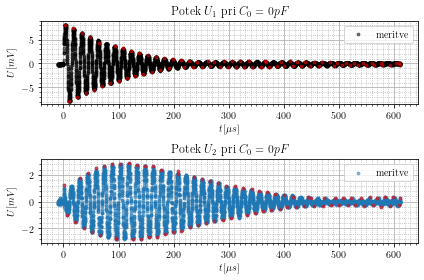

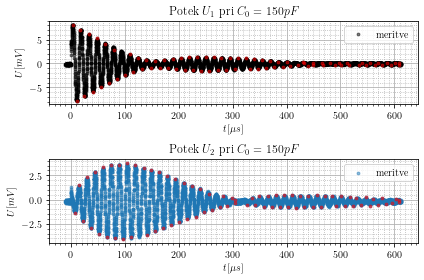

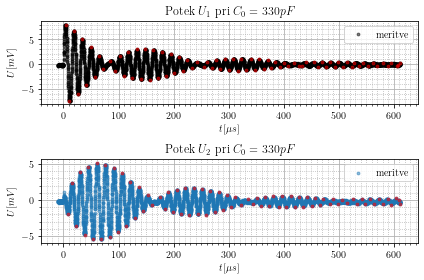

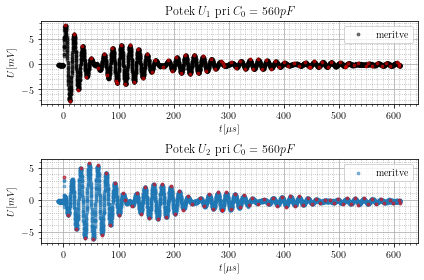

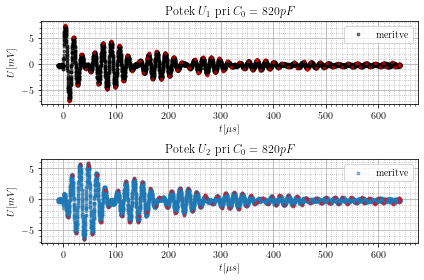

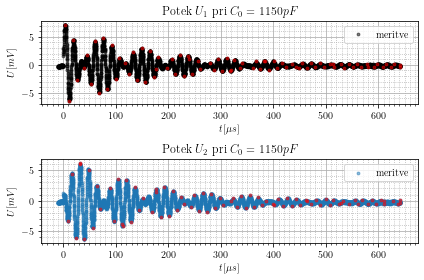

In [78]:
prvi_del('meritve/CSV1/SDS00001.csv', 0, 16e-6)
prvi_del('meritve/CSV1/SDS00002.csv', 150, 16e-6)
prvi_del('meritve/CSV1/SDS00003.csv', 330, 16e-6)
prvi_del('meritve/CSV1/SDS00004.csv', 560, 16e-6)
prvi_del('meritve/CSV1/SDS00005.csv', 820, 16e-6)
prvi_del('meritve/CSV1/SDS00006.csv', 1150, 16e-6)

In [71]:
def omega (N, Nt_0, dNt_0): 
    Nt_0 = unp.uarray([Nt_0], [dNt_0])
    return 2 * np.pi * Nt_0

In [72]:
 def domega_dBeta(T_0, dT_0, U_0, dU_0, U_T_0, dU_T_0):
    T_0 = unp.uarray([T_0], [dT_0])
    U_0 = unp.uarray([U_0], [dU_0])
    U_T_0 = unp.uarray([U_T_0], [dU_T_0])
    omega = 2*np.pi / T_0
    beta = 1/T_0 * np.log(U_0 / U_T_0)
    return omega, beta 

In [81]:
# U1 

omegaU1a = omega(14, 200e-6, 5e-6)
omegaU1b = omega(27, 400e-6, 5e-6)
omegaU1c = omega(38, 580e-6, 5e-6)
omegaU1d = omega(37, 600e-6, 5e-6)
omegaU1e = omega(37, 635e-6, 5e-6)
omegaU1f = omega(36, 630e-6, 5e-6)

# U2

omegaU2a = omega(22, 310e-6, 5e-6)
omegaU2b = omega(33, 500e-6, 5e-6)
omegaU2c = omega(40, 600e-6, 5e-6)
omegaU2d = omega(21, 310e-6, 5e-6)
omegaU2e = omega(21, 340e-6, 5e-6)
omegaU2f = omega(30, 500e-6, 5e-6)